In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_inv_nan = pd.read_csv('../data/Investments.csv', thousands=',')
data_inv = data_inv_nan.dropna()
data_inv

,User Id,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
0,1.0,40774,completed,1197,Productos de Consumo,"$55,000.00"
4,2.0,40785,withdrawn_by_choice,1197,Productos de Consumo,"$12,000.00"
7,3.0,42777,completed,1212,Bienes raíces,"$8,000.00"
8,4.0,45258,withdrawn,1201,Bienes raíces,"$20,000.00"
9,5.0,45508,completed,1201,Bienes raíces,"$8,000.00"
...,...,...,...,...,...,...
5819,2575.0,46674,canceled_by_expiration,1239,Productos de Consumo,"$20,000.00"
5820,2576.0,46658,canceled_by_profile,1239,Productos de Consumo,"$8,000.00"
5821,2577.0,46659,canceled_by_profile,1239,Productos de Consumo,"$5,000.00"
5822,2578.0,46665,canceled_by_expiration,1239,Productos de Consumo,"$8,800.00"


In [3]:
data_ide = pd.read_csv('../data/Identities.csv')
data_ide

,User Id,Age,Gender,State,Average Income
0,1,36,male,Ciudad de México,"$20,000.00"
1,2,35,male,Ciudad de México,"$300,000.00"
2,3,29,female,Ciudad de México,"$50,000.00"
3,4,45,male,Ciudad de México,"$50,000.00"
4,5,32,male,Guanajuato,"$20,000.00"
...,...,...,...,...,...
2574,2575,50,male,México,"$100,000.00"
2575,2576,43,male,Ciudad de México,"$100,000.00"
2576,2577,59,male,Baja California Sur,"$20,000.00"
2577,2578,36,female,Ciudad de México,"$20,000.00"


In [4]:
data = data_ide.merge(data_inv, on="User Id")
data

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
0,1,36,male,Ciudad de México,"$20,000.00",40774,completed,1197,Productos de Consumo,"$55,000.00"
1,2,35,male,Ciudad de México,"$300,000.00",40785,withdrawn_by_choice,1197,Productos de Consumo,"$12,000.00"
2,3,29,female,Ciudad de México,"$50,000.00",42777,completed,1212,Bienes raíces,"$8,000.00"
3,4,45,male,Ciudad de México,"$50,000.00",45258,withdrawn,1201,Bienes raíces,"$20,000.00"
4,5,32,male,Guanajuato,"$20,000.00",45508,completed,1201,Bienes raíces,"$8,000.00"
...,...,...,...,...,...,...,...,...,...,...
2574,2575,50,male,México,"$100,000.00",46674,canceled_by_expiration,1239,Productos de Consumo,"$20,000.00"
2575,2576,43,male,Ciudad de México,"$100,000.00",46658,canceled_by_profile,1239,Productos de Consumo,"$8,000.00"
2576,2577,59,male,Baja California Sur,"$20,000.00",46659,canceled_by_profile,1239,Productos de Consumo,"$5,000.00"
2577,2578,36,female,Ciudad de México,"$20,000.00",46665,canceled_by_expiration,1239,Productos de Consumo,"$8,800.00"


In [5]:
data['Average Income'] = data['Average Income'].str.replace('$', '', regex=True).replace(',', '', regex=True)
data['Average Income'] = data['Average Income'].astype(float)
data['Amount Invested'] = data['Amount Invested'].str.replace('$', '', regex=True).replace(',', '', regex=True)
data['Amount Invested'] = data['Amount Invested'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User Id            2579 non-null   int64  
 1   Age                2579 non-null   int64  
 2   Gender             2579 non-null   object 
 3   State              2577 non-null   object 
 4   Average Income     2579 non-null   float64
 5   Investment Id      2579 non-null   int64  
 6   Investment Status  2579 non-null   object 
 7   Investment Round   2579 non-null   int64  
 8   Industry           2579 non-null   object 
 9   Amount Invested    2579 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 221.6+ KB


# Pregunta

## ¿En qué ronda de inversión tuvimos más compromisos "withdrawn by choice"? 

In [6]:
withdrawn_by_choice = data[data['Investment Status'] == 'withdrawn_by_choice']
ronda_inv = withdrawn_by_choice.groupby(['Industry'])[['User Id']].count().sort_values('User Id', ascending=False)
ronda_inv

,User Id
Industry,
Productos de Consumo,57
Tecnología y comunicación,44
Bienes raíces,36
Servicios especializados,26
Infraestructura,17


## ¿Qué información demográfica (sexo, edad, lugar de residencia e ingreso promedio) podemos obtener de los usuarios que se retiraron de la ronda?

In [7]:
gender = withdrawn_by_choice.groupby('Gender')[['User Id']].count()
age = withdrawn_by_choice.groupby('Age')[['User Id']].count()
state = withdrawn_by_choice.groupby('State')[['User Id']].count()
income = withdrawn_by_choice.groupby('Average Income')[['User Id']].count()
income

,User Id
Average Income,
7000.0,38
14000.0,1
20000.0,72
27000.0,1
50000.0,49
100000.0,15
120000.0,1
300000.0,3


# Pregunta

## Información demográfica de los usuarios con mayor número de inversiones completadas.

In [8]:
completed_inv = data[data['Investment Status'] == 'completed'].sort_values('Amount Invested', ascending=False)
completed_inv.head(10)

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
1638,1639,56,male,Ciudad de México,300000.0,41773,completed,1197,Productos de Consumo,680000.0
1903,1904,65,male,Puebla,50000.0,40857,completed,1197,Productos de Consumo,664000.0
479,480,39,male,Ciudad de México,50000.0,40833,completed,1197,Productos de Consumo,550000.0
1178,1179,42,male,San Luis Potosí,100000.0,40807,completed,1197,Productos de Consumo,460500.0
1436,1437,39,male,Morelos,50000.0,40989,completed,1197,Productos de Consumo,330000.0
921,922,62,male,Aguascalientes,50000.0,41017,completed,1197,Productos de Consumo,250000.0
1901,1902,33,female,Hidalgo,7000.0,41305,completed,1197,Productos de Consumo,250000.0
1327,1328,36,male,Ciudad de México,300000.0,40800,completed,1197,Productos de Consumo,220000.0
6,7,34,male,Ciudad de México,300000.0,46216,completed,1239,Productos de Consumo,200000.0
1758,1759,34,male,México,7000.0,41359,completed,1197,Productos de Consumo,200000.0


# Pregunta

## ¿Cómo se encuentran distribuidas las cantidades invertidas en relación a los ingresos de los usuarios? 

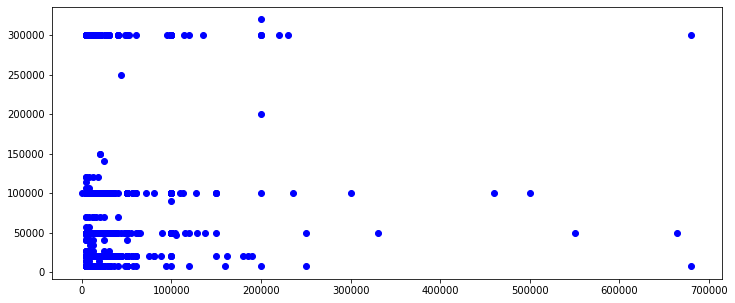

In [14]:
plt.figure(figsize=(12, 5))
x = data['Amount Invested']
y = data['Average Income']
plt.scatter(x, y, color="blue");

## De manera general, los usuarios que "ganan más", ¿invierten más?

In [25]:
completed_inv

,User Id,Age,Gender,State,Average Income,Investment Id,Investment Status,Investment Round,Industry,Amount Invested
1638,1639,56,male,Ciudad de México,300000.0,41773,completed,1197,Productos de Consumo,680000.0
1903,1904,65,male,Puebla,50000.0,40857,completed,1197,Productos de Consumo,664000.0
479,480,39,male,Ciudad de México,50000.0,40833,completed,1197,Productos de Consumo,550000.0
1178,1179,42,male,San Luis Potosí,100000.0,40807,completed,1197,Productos de Consumo,460500.0
1436,1437,39,male,Morelos,50000.0,40989,completed,1197,Productos de Consumo,330000.0
...,...,...,...,...,...,...,...,...,...,...
1773,1774,25,female,Tlaxcala,7000.0,41827,completed,1197,Productos de Consumo,5000.0
1774,1775,34,male,San Luis Potosí,7000.0,41316,completed,1197,Productos de Consumo,5000.0
1775,1776,53,female,México,7000.0,41262,completed,1197,Productos de Consumo,5000.0
1776,1777,30,male,Guanajuato,20000.0,41495,completed,1197,Productos de Consumo,5000.0


# Pregunta

## ¿Cuál es la industria que más capital recoge en términos de inversiones completadas?

In [31]:
industry_inv = completed_inv.groupby('Industry')[['Investment Status']].count().sort_values(by='Investment Status', ascending=False)
industry_inv

,Investment Status
Industry,
Productos de Consumo,822
Servicios especializados,230
Bienes raíces,207
Tecnología y comunicación,181
Infraestructura,144


## ¿Cuál es la proporción de inversiones completadas respecto a las canceladas por falta de pago en todas las industrias?

In [62]:
status = ['completed', 'canceled_by_expiration']
proporcion_inv = data[data['Investment Status'].isin(status)].sort_values('Amount Invested', ascending=False)
#group_proporcion_inv = proporcion_inv.groupby('Investment Status')[['User Id']].count()
#sum_proporcion_inv = proporcion_inv.groupby('Investment Status')[['Amount Invested']].sum()
industry_proporcion_inv = proporcion_inv.groupby(['Industry', 'Investment Status'])[['User Id']].count().reset_index()
industry_proporcion_inv

,Industry,Investment Status,User Id
0,Bienes raíces,canceled_by_expiration,35
1,Bienes raíces,completed,207
2,Infraestructura,canceled_by_expiration,7
3,Infraestructura,completed,144
4,Productos de Consumo,canceled_by_expiration,57
5,Productos de Consumo,completed,822
6,Servicios especializados,canceled_by_expiration,45
7,Servicios especializados,completed,230
8,Tecnología y comunicación,canceled_by_expiration,11
9,Tecnología y comunicación,completed,181
